In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("twcs.csv", encoding='utf-8')
df = full_df[["text"]]
df["text"] = df["text"].astype(str)
full_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [2]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
tweet_id                   int64
author_id                  object
inbound                    bool
created_at                 object
text                       object
response_tweet_id          object
in_response_to_tweet_id    float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm import tqdm_notebook
import seaborn
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kochh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
tweets = full_df

# Get customer requests and company responses 
# (from https://www.kaggle.com/soaxelbrooke/first-inbound-and-response-tweets/code)
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

# Enable progress reporting on `df.apply` calls
tqdm_notebook().pandas()

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()


def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']


In [5]:
inbounds_and_outbounds['inbound_sentiment'] = \
    inbounds_and_outbounds.text_x.progress_apply(sentiment_for)

In [6]:
count = (inbounds_and_outbounds['inbound_sentiment'] < 0).sum()
count

293174

In [11]:
inbounds_and_outbounds.head()
author_grouped = inbounds_and_outbounds.groupby('author_id_y')

In [112]:

top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id_x'], ascending=[0])
                                .index[:20]
                                .values)


In [126]:
y= inbounds_and_outbounds.loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)]  
y.groupby('author_id_y').tweet_id_x.count().sort_values()

author_id_y
sainsburys         10763
AskPlayStation     11397
XboxSupport        12509
sprintcare         12649
ChipotleTweets     13853
hulu_support       14194
UPSHelp            14293
VirginTrains       14357
Ask_Spectrum       17270
British_Airways    19611
TMobileHelp        20065
SouthwestAir       20986
comcastcares       23841
AmericanAir        24506
Tesco              24887
SpotifyCares       26940
Delta              28485
Uber_Support       40029
AppleSupport       74632
AmazonHelp         84637
Name: tweet_id_x, dtype: int64

In [128]:
z= inbounds_and_outbounds.loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)].groupby('author_id_y').inbound_sentiment.mean().sort_values() 
z

author_id_y
sprintcare        -0.127022
AppleSupport      -0.100092
UPSHelp           -0.098611
Uber_Support      -0.091626
Ask_Spectrum      -0.088825
comcastcares      -0.069502
AmazonHelp        -0.028769
hulu_support      -0.023751
TMobileHelp       -0.016301
Tesco              0.002087
VirginTrains       0.027975
ChipotleTweets     0.030829
AskPlayStation     0.038767
XboxSupport        0.039526
AmericanAir        0.051576
British_Airways    0.061196
sainsburys         0.069190
SpotifyCares       0.080000
Delta              0.126659
SouthwestAir       0.207931
Name: inbound_sentiment, dtype: float64

In [ ]:
#So we take 5 brands which have negative sentiment for modelling

In [14]:

amazonQnR = inbounds_and_outbounds[inbounds_and_outbounds["author_id_y"]=="AmazonHelp"]
amazonQnR

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y,inbound_sentiment
49,272,115770,True,Wed Nov 22 09:14:39 +0000 2017,amazonのfireTVstickが見れない😢,269,NaN,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0,0.0000
64,325,115792,True,Wed Nov 22 08:55:35 +0000 2017,amazonプライムビデオ、再生エラーが多いです,324,NaN,324,AmazonHelp,False,Wed Nov 22 09:06:00 +0000 2017,@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...,NaN,325.0,0.0000
92,617,115820,True,Tue Oct 31 22:16:32 +0000 2017,Way to drop the ball on customer service @1158...,615,NaN,615,AmazonHelp,False,Tue Oct 31 22:29:00 +0000 2017,@115820 I'm sorry we've let you down! Without ...,616,617.0,-0.8298
93,621,115822,True,Tue Oct 31 22:19:34 +0000 2017,@115823 I want my amazon payments account CLOS...,620,NaN,620,AmazonHelp,False,Tue Oct 31 22:28:34 +0000 2017,@115822 I am unable to affect your account via...,NaN,621.0,0.5106
94,624,115824,True,Tue Oct 31 22:12:37 +0000 2017,"@115825 also, beim Addams Family-Film in Prime...",622,NaN,622,AmazonHelp,False,Tue Oct 31 22:28:00 +0000 2017,"@115824 Hi, wir erhalten die Filme/Serien so v...",623,624.0,0.0000
96,632,115829,True,Tue Oct 31 21:34:58 +0000 2017,@115830 my package was ‘accidentally’ opened.....,631,NaN,631,AmazonHelp,False,Tue Oct 31 22:27:00 +0000 2017,@115829 I'm sorry your order arrived in this c...,NaN,632.0,0.4912
97,634,115831,True,Tue Oct 31 21:39:58 +0000 2017,@115821 @AmazonHelp why is my order at my loca...,633,NaN,633,AmazonHelp,False,Tue Oct 31 22:26:37 +0000 2017,@115831 I'm sorry for the wait. Please reach o...,NaN,634.0,0.0000
98,636,115832,True,Tue Oct 31 22:05:36 +0000 2017,"Thanks for the style advice, @115833 look ...I...",635,NaN,635,AmazonHelp,False,Tue Oct 31 22:26:07 +0000 2017,@115832 Alexa says both styles are working for...,NaN,636.0,0.4404
99,643,115834,True,Mon Oct 30 23:44:45 +0000 2017,Bought an @115821 Echo Show and it won’t recog...,642,NaN,642,AmazonHelp,False,Tue Oct 31 00:52:39 +0000 2017,"@115834 Oh no, I'm sorry for the issues! For t...",641,643.0,-0.6739
100,646,115835,True,Tue Oct 31 21:40:30 +0000 2017,.@AmazonHelp Item has not been delivered but t...,644,NaN,644,AmazonHelp,False,Tue Oct 31 22:25:27 +0000 2017,@115835 I'm so sorry you didn't receive your p...,645,646.0,0.0000


In [15]:
amazonQnR['inbound_sentiment'] = \
    amazonQnR.text_x.progress_apply(sentiment_for)

In [16]:
count = (amazonQnR['inbound_sentiment'] < 0).sum()
count

30240

In [17]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['hi', 'that', 'us', 'we', 'please', 'Please', 'DM', 'get', 'I', 'help','go','try','see','next', 'make', 'much', 'need','much', 'would','still','keep','can','ever', 'thank', 'may', 'would', 'really','let', 'well', 'could', 'make', 'even', 'buy', 'also', 'ago','https', 'be','away', 'yesterday','case', 'today', 'day', 'amp', 'person', 'customer', 'product','where', 'really', 'soon' ])


In [19]:
dm= amazonQnR['text_x']

In [20]:
data = dm.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [22]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [23]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm',  disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [25]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [20]:
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
print("Derivation of Term Matrix T of Training Document Word Stems: ",
      lsi_model.get_topics())

Derivation of Term Matrix T of Training Document Word Stems:  [[ 2.10324258e-03  9.93657724e-03  1.12271109e-01 ...  5.34371104e-10
   5.34371104e-10  6.76431088e-06]
 [ 1.04717543e-03  7.10714187e-03  9.46001861e-02 ... -1.45278711e-09
  -1.45278711e-09  1.48712105e-05]
 [ 7.74852596e-04  6.03277871e-03  2.18074659e-02 ... -2.64871961e-10
  -2.64871961e-10  1.61049337e-06]
 ...
 [ 1.39129059e-04 -1.91358645e-03  3.06401779e-01 ...  3.78780924e-09
   3.78780924e-09 -4.76587525e-06]
 [ 8.35336389e-04  1.18943569e-03 -2.16275110e-01 ...  3.38721099e-09
   3.38721099e-09 -2.52642632e-06]
 [ 9.11668317e-05  7.94031016e-03 -2.16830828e-01 ...  2.18888805e-11
   2.18888805e-11 -4.12333564e-05]]


In [32]:
lsi_model.print_topics()

[(0,
  '0.744*"order" + 0.337*"delivery" + 0.289*"deliver" + 0.156*"co" + 0.131*"say" + 0.126*"prime" + 0.115*"get" + 0.112*"service" + 0.111*"package" + 0.107*"time"'),
 (1,
  '0.678*"delivery" + -0.584*"order" + 0.202*"package" + 0.193*"deliver" + 0.155*"co" + 0.121*"prime" + 0.104*"say" + 0.095*"service" + 0.086*"time" + -0.057*"cancel"'),
 (2,
  '0.676*"deliver" + -0.551*"delivery" + 0.293*"package" + 0.245*"co" + -0.192*"order" + 0.139*"say" + 0.079*"get" + 0.054*"time" + 0.044*"item" + 0.043*"receive"'),
 (3,
  '0.872*"co" + -0.420*"deliver" + -0.115*"delivery" + 0.076*"get" + -0.072*"say" + 0.046*"service" + -0.044*"package" + 0.042*"refund" + 0.035*"return" + 0.033*"use"'),
 (4,
  '0.421*"service" + 0.381*"prime" + -0.304*"co" + -0.298*"deliver" + -0.268*"delivery" + 0.226*"day" + 0.208*"get" + 0.186*"time" + 0.156*"pay" + 0.147*"item"'),
 (5,
  '-0.678*"service" + 0.425*"package" + 0.364*"prime" + -0.192*"bad" + -0.177*"deliver" + 0.133*"day" + 0.131*"pay" + 0.128*"arrive" + -

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.349*"team" + 0.205*"support" + 0.200*"page" + 0.112*"report" + '
  '0.043*"process" + 0.039*"dispatch" + 0.004*"enter" + 0.002*"instal" + '
  '0.000*"consider" + 0.000*"public"'),
 (1,
  '0.359*"receive" + 0.270*"package" + 0.070*"parcel" + 0.069*"chance" + '
  '0.063*"moment" + 0.027*"wt" + 0.022*"number" + 0.016*"echo" + '
  '0.013*"recommend" + 0.011*"hasnt_arrive"'),
 (2,
  '0.514*"check" + 0.115*"however" + 0.113*"shipping" + 0.100*"inconvenience" '
  '+ 0.042*"longer" + 0.031*"processing" + 0.013*"notification" + '
  '0.010*"manage" + 0.000*"concern" + 0.000*"email"'),
 (3,
  '0.497*"know" + 0.196*"want" + 0.096*"service" + 0.067*"let" + 0.056*"help" '
  '+ 0.021*"eligible" + 0.018*"well" + 0.000*"post" + 0.000*"hope" + '
  '0.000*"assist"'),
 (4,
  '0.154*"mail" + 0.129*"twitter" + 0.118*"confirmation" + 0.100*"tracking" + '
  '0.096*"take" + 0.090*"show" + 0.085*"access" + 0.056*"unable" + '
  '0.052*"late" + 0.045*"device"'),
 (5,
  '0.407*"experience" + 0.312*"delay

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.897692219412356

Coherence Score:  0.36936656445336014


In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.325548  0.334235       1        1  19.784258
11     0.178489 -0.296179       2        1  10.190444
13     0.124719 -0.103999       3        1   8.300877
17     0.094966 -0.061419       4        1   7.479510
18     0.133348 -0.121306       5        1   7.068352
4      0.034276 -0.013894       6        1   4.657820
0     -0.057332  0.018855       7        1   4.356973
9     -0.001366  0.002089       8        1   4.313430
16    -0.029562  0.011704       9        1   4.229319
10    -0.040957  0.014955      10        1   3.821076
1     -0.015306  0.007253      11        1   3.340499
3     -0.064204  0.020385      12        1   3.176893
19    -0.067374  0.021100      13        1   3.136584
6     -0.053219  0.018081      14        1   2.993225
5     -0.062446  0.019991      15        1   2.748274
7     -0.082203  0.023969      16        1   2.531111
8     -0.095479  0.026349      17        1   2.503340
2     -0.103432  0.027508      18        1   2.356361
14    -0.059972  0.019402      19        1   2.150042
15    -0.158495  0.030919      20        1   0.861606, topic_info=     Category          Freq              Term         Total  loglift  logprob
29    Default  33315.000000                co  33315.000000  30.0000  30.0000
1     Default  30008.000000                be  30008.000000  29.0000  29.0000
32    Default  23808.000000             order  23808.000000  28.0000  28.0000
34    Default  22581.000000             sorry  22581.000000  27.0000  27.0000
9     Default  13490.000000             would  13490.000000  26.0000  26.0000
35    Default  12775.000000          delivery  12775.000000  25.0000  25.0000
126   Default   8243.000000              know   8243.000000  24.0000  24.0000
58    Default   8408.000000              hear   8408.000000  23.0000  23.0000
81    Default   7939.000000              team   7939.000000  22.0000  22.0000
8     Default  10787.000000           provide  10787.000000  21.0000  21.0000
36    Default   9231.000000              look   9231.000000  20.0000  20.0000
4     Default  10418.000000       information  10418.000000  19.0000  19.0000
43    Default   6319.000000             check   6319.000000  18.0000  18.0000
66    Default   9930.000000            detail   9930.000000  17.0000  17.0000
50    Default   6261.000000           receive   6261.000000  16.0000  16.0000
162   Default   5831.000000        experience   5831.000000  15.0000  15.0000
121   Default   5891.000000              item   5891.000000  14.0000  14.0000
5     Default   6424.000000             issue   6424.000000  13.0000  13.0000
191   Default   7397.000000              date   7397.000000  12.0000  12.0000
10    Default   8441.000000           account   8441.000000  11.0000  11.0000
83    Default   4469.000000             delay   4469.000000  10.0000  10.0000
95    Default   4713.000000           package   4713.000000   9.0000   9.0000
74    Default   4135.000000           carrier   4135.000000   8.0000   8.0000
129   Default   4103.000000              tell   4103.000000   7.0000   7.0000
17    Default   4654.000000           support   4654.000000   6.0000   6.0000
33    Default   8996.000000             reach   8996.000000   5.0000   5.0000
45    Default   4554.000000              page   4554.000000   4.0000   4.0000
61    Default   4235.000000              find   4235.000000   3.0000   3.0000
65    Default   5255.000000           contact   5255.000000   2.0000   2.0000
18    Default   3425.000000              time   3425.000000   1.0000   1.0000
...       ...           ...               ...           ...      ...      ...
1548  Topic20      0.051570            mobile      1.165734   1.6360 -11.3758
3269  Topic20      0.051567        multi_room      1.165677   1.6360 -11.3758
1213  Topic20      0.051569                ti      1.165716   1.6359 -11.3758
2041  Topic20      0.051567  different_

In [26]:
from gensim.models import LsiModel

In [27]:
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 5      )


In [28]:
lsi_model.print_topics()

[(0,
  '0.745*"order" + 0.337*"delivery" + 0.290*"deliver" + 0.156*"co" + 0.131*"say" + 0.125*"prime" + 0.114*"get" + 0.112*"service" + 0.110*"package" + 0.107*"time"'),
 (1,
  '0.682*"delivery" + -0.583*"order" + 0.199*"package" + 0.193*"deliver" + 0.156*"co" + 0.118*"prime" + 0.102*"say" + 0.095*"service" + 0.084*"time" + -0.057*"cancel"'),
 (2,
  '0.670*"deliver" + -0.550*"delivery" + 0.294*"package" + 0.261*"co" + -0.194*"order" + 0.138*"say" + 0.079*"get" + 0.058*"time" + -0.046*"prime" + 0.044*"item"'),
 (3,
  '0.865*"co" + -0.434*"deliver" + -0.108*"delivery" + 0.077*"get" + -0.073*"say" + 0.051*"service" + -0.050*"package" + 0.043*"refund" + 0.035*"return" + 0.033*"use"'),
 (4,
  '0.473*"service" + 0.373*"prime" + -0.303*"co" + -0.277*"deliver" + -0.262*"delivery" + 0.215*"day" + 0.200*"get" + 0.181*"time" + 0.154*"pay" + -0.144*"order"')]

In [29]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [30]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.067*"item" + 0.042*"take" + 0.041*"use" + 0.041*"tell" + 0.039*"refund" + '
  '0.032*"wait" + 0.025*"find" + 0.024*"money" + 0.024*"charge" + '
  '0.022*"make"'),
 (1,
  '0.099*"day" + 0.047*"want" + 0.040*"week" + 0.033*"late" + 0.016*"point" + '
  '0.016*"experience" + 0.015*"track" + 0.013*"price" + 0.013*"house" + '
  '0.012*"deal"'),
 (2,
  '0.036*"have" + 0.032*"back" + 0.031*"show" + 0.027*"box" + 0.025*"month" + '
  '0.025*"buy" + 0.025*"s" + 0.023*"wrong" + 0.023*"book" + 0.020*"support"'),
 (3,
  '0.127*"order" + 0.075*"deliver" + 0.049*"prime" + 0.026*"receive" + '
  '0.023*"shipping" + 0.023*"ship" + 0.020*"account" + 0.019*"email" + '
  '0.019*"call" + 0.018*"can"'),
 (4,
  '0.054*"delivery" + 0.048*"co" + 0.045*"package" + 0.026*"say" + '
  '0.025*"time" + 0.024*"service" + 0.024*"get" + 0.017*"arrive" + 0.016*"pay" '
  '+ 0.015*"go"')]


In [31]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.416292231985306

Coherence Score:  0.2259491269661896


In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.410271 -0.016386       1        1  42.031143
3     -0.119582 -0.379824       2        1  25.225471
0     -0.104051  0.158119       3        1  12.399277
2     -0.095355  0.125504       4        1  10.975918
1     -0.091283  0.112587       5        1   9.368180, topic_info=     Category          Freq        Term         Total  loglift  logprob
26    Default  16884.000000       order  16884.000000  30.0000  30.0000
22    Default  10033.000000     deliver  10033.000000  29.0000  29.0000
21    Default   4915.000000         day   4915.000000  28.0000  28.0000
11    Default  11916.000000    delivery  11916.000000  27.0000  27.0000
10    Default  10722.000000          co  10722.000000  26.0000  26.0000
13    Default   4414.000000        item   4414.000000  25.0000  25.0000
150   Default   6536.000000       prime   6536.000000  24.0000  24.0000
16    Default  10054.000000     package  10054.000000  23.0000  23.0000
154   Default   2776.000000        take   2776.000000  22.0000  22.0000
86    Default   2716.000000         use   2716.000000  21.0000  21.0000
112   Default   2655.000000        tell   2655.000000  20.0000  20.0000
6     Default   2323.000000        want   2323.000000  19.0000  19.0000
72    Default   2546.000000      refund   2546.000000  18.0000  18.0000
42    Default   5837.000000         say   5837.000000  17.0000  17.0000
140   Default   3427.000000     receive   3427.000000  16.0000  16.0000
44    Default   5442.000000        time   5442.000000  15.0000  15.0000
27    Default   1976.000000        week   1976.000000  14.0000  14.0000
2     Default   5355.000000     service   5355.000000  13.0000  13.0000
83    Default   2077.000000        have   2077.000000  12.0000  12.0000
147   Default   5251.000000         get   5251.000000  11.0000  11.0000
68    Default   2092.000000        wait   2092.000000  10.0000  10.0000
326   Default   3112.000000    shipping   3112.000000   9.0000   9.0000
79    Default   3024.000000        ship   3024.000000   8.0000   8.0000
146   Default   1846.000000        back   1846.000000   7.0000   7.0000
37    Default   1775.000000        show   1775.000000   6.0000   6.0000
24    Default   1634.000000        late   1634.000000   5.0000   5.0000
3     Default   2601.000000     account   2601.000000   4.0000   4.0000
178   Default   2592.000000       email   2592.000000   3.0000   3.0000
109   Default   2559.000000        call   2559.000000   2.0000   2.0000
654   Default   1655.000000        find   1655.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
21     Topic5   4914.920898         day   4915.683594   2.3677  -2.3086
6      Topic5   2323.232422        want   2323.991211   2.3675  -3.0579
27     Topic5   1975.571045        week   1976.328979   2.3675  -3.2200
24     Topic5   1633.675537        late   1634.437866   2.3674  -3.4101
405    Topic5    795.399902       point    796.159302   2.3669  -4.1298
349    Topic5    788.768372  experience    789.525513   2.3669  -4.1382
431    Topic5    752.744751       track    753.506409   2.3668  -4.1849
894    Topic5    658.198242       price    658.953491   2.3667  -4.3191
129    Topic5    645.295471       house    646.059875   2.3667  -4.3389
402    Topic5    615.879028        deal    616.637329   2.3666  -4.3856
393    Topic5    614.389709     company    615.148743   2.3666  -4.3880
60     Topic5    608.320007       steal    609.081604   2.3666  -4.3980
763    Topic5    571.178467        able    571.935608   2.3665  -4.4610
273    Topic5    570.615662        play    571.372192   2.3665  -4.4619
128    Topic5    559.065002   seriously    559.824951   2.3665  -4.4824
108    Topic5    553.968384         due    554.725769   2.3665  -4.4915
272    Topic5    532.906494       music    533.662842   2.3664  -4.5303
647    Topic5    532.827454      always    533.5880

In [ ]:
#Again with 20 topics

In [20]:
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
print("Derivation of Term Matrix T of Training Document Word Stems: ",
      lsi_model.get_topics())

Derivation of Term Matrix T of Training Document Word Stems:  [[ 2.10324258e-03  9.93657724e-03  1.12271109e-01 ...  5.34371104e-10
   5.34371104e-10  6.76431088e-06]
 [ 1.04717543e-03  7.10714187e-03  9.46001861e-02 ... -1.45278711e-09
  -1.45278711e-09  1.48712105e-05]
 [ 7.74852596e-04  6.03277871e-03  2.18074659e-02 ... -2.64871961e-10
  -2.64871961e-10  1.61049337e-06]
 ...
 [ 1.39129059e-04 -1.91358645e-03  3.06401779e-01 ...  3.78780924e-09
   3.78780924e-09 -4.76587525e-06]
 [ 8.35336389e-04  1.18943569e-03 -2.16275110e-01 ...  3.38721099e-09
   3.38721099e-09 -2.52642632e-06]
 [ 9.11668317e-05  7.94031016e-03 -2.16830828e-01 ...  2.18888805e-11
   2.18888805e-11 -4.12333564e-05]]


In [32]:
lsi_model.print_topics()

[(0,
  '0.744*"order" + 0.337*"delivery" + 0.289*"deliver" + 0.156*"co" + 0.131*"say" + 0.126*"prime" + 0.115*"get" + 0.112*"service" + 0.111*"package" + 0.107*"time"'),
 (1,
  '0.678*"delivery" + -0.584*"order" + 0.202*"package" + 0.193*"deliver" + 0.155*"co" + 0.121*"prime" + 0.104*"say" + 0.095*"service" + 0.086*"time" + -0.057*"cancel"'),
 (2,
  '0.676*"deliver" + -0.551*"delivery" + 0.293*"package" + 0.245*"co" + -0.192*"order" + 0.139*"say" + 0.079*"get" + 0.054*"time" + 0.044*"item" + 0.043*"receive"'),
 (3,
  '0.872*"co" + -0.420*"deliver" + -0.115*"delivery" + 0.076*"get" + -0.072*"say" + 0.046*"service" + -0.044*"package" + 0.042*"refund" + 0.035*"return" + 0.033*"use"'),
 (4,
  '0.421*"service" + 0.381*"prime" + -0.304*"co" + -0.298*"deliver" + -0.268*"delivery" + 0.226*"day" + 0.208*"get" + 0.186*"time" + 0.156*"pay" + 0.147*"item"'),
 (5,
  '-0.678*"service" + 0.425*"package" + 0.364*"prime" + -0.192*"bad" + -0.177*"deliver" + 0.133*"day" + 0.131*"pay" + 0.128*"arrive" + -

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.349*"team" + 0.205*"support" + 0.200*"page" + 0.112*"report" + '
  '0.043*"process" + 0.039*"dispatch" + 0.004*"enter" + 0.002*"instal" + '
  '0.000*"consider" + 0.000*"public"'),
 (1,
  '0.359*"receive" + 0.270*"package" + 0.070*"parcel" + 0.069*"chance" + '
  '0.063*"moment" + 0.027*"wt" + 0.022*"number" + 0.016*"echo" + '
  '0.013*"recommend" + 0.011*"hasnt_arrive"'),
 (2,
  '0.514*"check" + 0.115*"however" + 0.113*"shipping" + 0.100*"inconvenience" '
  '+ 0.042*"longer" + 0.031*"processing" + 0.013*"notification" + '
  '0.010*"manage" + 0.000*"concern" + 0.000*"email"'),
 (3,
  '0.497*"know" + 0.196*"want" + 0.096*"service" + 0.067*"let" + 0.056*"help" '
  '+ 0.021*"eligible" + 0.018*"well" + 0.000*"post" + 0.000*"hope" + '
  '0.000*"assist"'),
 (4,
  '0.154*"mail" + 0.129*"twitter" + 0.118*"confirmation" + 0.100*"tracking" + '
  '0.096*"take" + 0.090*"show" + 0.085*"access" + 0.056*"unable" + '
  '0.052*"late" + 0.045*"device"'),
 (5,
  '0.407*"experience" + 0.312*"delay

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.897692219412356

Coherence Score:  0.36936656445336014


In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.325548  0.334235       1        1  19.784258
11     0.178489 -0.296179       2        1  10.190444
13     0.124719 -0.103999       3        1   8.300877
17     0.094966 -0.061419       4        1   7.479510
18     0.133348 -0.121306       5        1   7.068352
4      0.034276 -0.013894       6        1   4.657820
0     -0.057332  0.018855       7        1   4.356973
9     -0.001366  0.002089       8        1   4.313430
16    -0.029562  0.011704       9        1   4.229319
10    -0.040957  0.014955      10        1   3.821076
1     -0.015306  0.007253      11        1   3.340499
3     -0.064204  0.020385      12        1   3.176893
19    -0.067374  0.021100      13        1   3.136584
6     -0.053219  0.018081      14        1   2.993225
5     -0.062446  0.019991      15        1   2.748274
7     -0.082203  0.023969      16        1   2.531111
8     -0.095479  0.026349      17        1   2.503340
2     -0.103432  0.027508      18        1   2.356361
14    -0.059972  0.019402      19        1   2.150042
15    -0.158495  0.030919      20        1   0.861606, topic_info=     Category          Freq              Term         Total  loglift  logprob
29    Default  33315.000000                co  33315.000000  30.0000  30.0000
1     Default  30008.000000                be  30008.000000  29.0000  29.0000
32    Default  23808.000000             order  23808.000000  28.0000  28.0000
34    Default  22581.000000             sorry  22581.000000  27.0000  27.0000
9     Default  13490.000000             would  13490.000000  26.0000  26.0000
35    Default  12775.000000          delivery  12775.000000  25.0000  25.0000
126   Default   8243.000000              know   8243.000000  24.0000  24.0000
58    Default   8408.000000              hear   8408.000000  23.0000  23.0000
81    Default   7939.000000              team   7939.000000  22.0000  22.0000
8     Default  10787.000000           provide  10787.000000  21.0000  21.0000
36    Default   9231.000000              look   9231.000000  20.0000  20.0000
4     Default  10418.000000       information  10418.000000  19.0000  19.0000
43    Default   6319.000000             check   6319.000000  18.0000  18.0000
66    Default   9930.000000            detail   9930.000000  17.0000  17.0000
50    Default   6261.000000           receive   6261.000000  16.0000  16.0000
162   Default   5831.000000        experience   5831.000000  15.0000  15.0000
121   Default   5891.000000              item   5891.000000  14.0000  14.0000
5     Default   6424.000000             issue   6424.000000  13.0000  13.0000
191   Default   7397.000000              date   7397.000000  12.0000  12.0000
10    Default   8441.000000           account   8441.000000  11.0000  11.0000
83    Default   4469.000000             delay   4469.000000  10.0000  10.0000
95    Default   4713.000000           package   4713.000000   9.0000   9.0000
74    Default   4135.000000           carrier   4135.000000   8.0000   8.0000
129   Default   4103.000000              tell   4103.000000   7.0000   7.0000
17    Default   4654.000000           support   4654.000000   6.0000   6.0000
33    Default   8996.000000             reach   8996.000000   5.0000   5.0000
45    Default   4554.000000              page   4554.000000   4.0000   4.0000
61    Default   4235.000000              find   4235.000000   3.0000   3.0000
65    Default   5255.000000           contact   5255.000000   2.0000   2.0000
18    Default   3425.000000              time   3425.000000   1.0000   1.0000
...       ...           ...               ...           ...      ...      ...
1548  Topic20      0.051570            mobile      1.165734   1.6360 -11.3758
3269  Topic20      0.051567        multi_room      1.165677   1.6360 -11.3758
1213  Topic20      0.051569                ti      1.165716   1.6359 -11.3758
2041  Topic20      0.051567  different_

In [ ]:
#APPLE

In [33]:

appleQnR = inbounds_and_outbounds[inbounds_and_outbounds["author_id_y"]=="AppleSupport"]

In [67]:
appleQnR['inbound_sentiment'] = \
    appleQnR.text_x.progress_apply(sentiment_for)

In [68]:
count = (appleQnR['inbound_sentiment'] < 0).sum().sum()
count

32982

In [69]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [70]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['hi', 'that', 'us', 'we', 'please', 'Please', 'DM', 'get', 'I', 'help', 'thank', 'may', 'would', 'really','let', 'well', 'could', 'make', 'even', 'buy', 'also', 'ago','https', 'be','away', 'yesterday','case', 'today', 'day', 'amp', 'person', 'customer', 'product','where', 'really', 'soon' ])


In [71]:
dm= appleQnR['text_x']

In [72]:
data = dm.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [73]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [74]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [43]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm',  disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [44]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [45]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 5   )
lsi_model.print_topics()

[(0,
  '0.628*"phone" + 0.572*"update" + 0.239*"fix" + 0.149*"new" + 0.138*"battery" + 0.129*"go" + 0.113*"work" + 0.097*"time" + 0.085*"get" + 0.085*"keep"'),
 (1,
  '0.709*"fix" + -0.601*"phone" + 0.212*"update" + 0.128*"go" + 0.103*"issue" + 0.098*"battery" + 0.081*"co" + 0.080*"problem" + 0.071*"glitch" + 0.064*"need"'),
 (2,
  '-0.725*"update" + 0.502*"fix" + 0.405*"phone" + 0.121*"go" + 0.052*"issue" + 0.050*"shit" + -0.050*"battery" + -0.050*"late" + 0.050*"glitch" + 0.048*"need"'),
 (3,
  '0.410*"go" + -0.354*"fix" + 0.324*"co" + 0.276*"battery" + 0.254*"work" + -0.225*"update" + -0.206*"phone" + 0.202*"time" + 0.193*"apple" + 0.178*"get"'),
 (4,
  '-0.773*"battery" + 0.305*"work" + 0.297*"co" + -0.201*"drain" + -0.165*"life" + -0.140*"go" + 0.110*"try" + 0.096*"app" + 0.094*"keep" + 0.083*"get"')]

In [46]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [47]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.082*"go" + 0.070*"co" + 0.048*"issue" + 0.026*"come" + 0.025*"happen" + '
  '0.023*"ios" + 0.021*"crash" + 0.020*"bug" + 0.017*"bad" + 0.016*"thing"'),
 (1,
  '0.069*"use" + 0.044*"can" + 0.042*"call" + 0.031*"hour" + 0.027*"change" + '
  '0.027*"store" + 0.027*"tell" + 0.026*"software" + 0.025*"email" + '
  '0.022*"notification"'),
 (2,
  '0.051*"time" + 0.044*"battery" + 0.041*"apple" + 0.034*"iphone" + '
  '0.031*"screen" + 0.026*"problem" + 0.025*"turn" + 0.023*"be" + '
  '0.021*"music" + 0.020*"charge"'),
 (3,
  '0.109*"fix" + 0.039*"need" + 0.028*"say" + 0.027*"thank" + 0.025*"want" + '
  '0.021*"message" + 0.020*"make" + 0.018*"play" + 0.016*"contact" + '
  '0.014*"run"'),
 (4,
  '0.107*"phone" + 0.081*"update" + 0.042*"work" + 0.031*"get" + 0.031*"new" + '
  '0.026*"keep" + 0.024*"app" + 0.023*"try" + 0.019*"still" + 0.016*"back"')]


In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.886798447333697

Coherence Score:  0.254790711260286


In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.415777  0.031602       1        1  33.730473
2     -0.135528  0.385894       2        1  22.607098
0     -0.099379 -0.158330       3        1  16.347193
3     -0.089977 -0.142952       4        1  16.329121
1     -0.090893 -0.116213       5        1  10.986118, topic_info=    Category          Freq          Term         Total  loglift  logprob
14   Default  17961.000000         phone  17961.000000  30.0000  30.0000
53   Default   8818.000000           fix   8818.000000  29.0000  29.0000
28   Default  13482.000000        update  13482.000000  28.0000  28.0000
34   Default   6653.000000            go   6653.000000  27.0000  27.0000
9    Default   5643.000000            co   5643.000000  26.0000  26.0000
45   Default   5684.000000          time   5684.000000  25.0000  25.0000
166  Default   3753.000000           use   3753.000000  24.0000  24.0000
29   Default   7080.000000          work   7080.000000  23.0000  23.0000
49   Default   4978.000000       battery   4978.000000  22.0000  22.0000
1    Default   3921.000000         issue   3921.000000  21.0000  21.0000
57   Default   4610.000000         apple   4610.000000  20.0000  20.0000
51   Default   3186.000000          need   3186.000000  19.0000  19.0000
111  Default   3861.000000        iphone   3861.000000  18.0000  18.0000
19   Default   5184.000000           get   5184.000000  17.0000  17.0000
165  Default   5170.000000           new   5170.000000  16.0000  16.0000
107  Default   2391.000000           can   2391.000000  15.0000  15.0000
203  Default   3441.000000        screen   3441.000000  14.0000  14.0000
70   Default   2277.000000          call   2277.000000  13.0000  13.0000
12   Default   4356.000000          keep   4356.000000  12.0000  12.0000
69   Default   4070.000000           app   4070.000000  11.0000  11.0000
129  Default   2858.000000       problem   2858.000000  10.0000  10.0000
16   Default   3911.000000           try   3911.000000   9.0000   9.0000
23   Default   2300.000000           say   2300.000000   8.0000   8.0000
109  Default   2774.000000          turn   2774.000000   7.0000   7.0000
37   Default   2177.000000         thank   2177.000000   6.0000   6.0000
197  Default   2606.000000            be   2606.000000   5.0000   5.0000
168  Default   2128.000000          come   2128.000000   4.0000   4.0000
125  Default   1704.000000          hour   1704.000000   3.0000   3.0000
322  Default   2036.000000          want   2036.000000   2.0000   2.0000
20   Default   2030.000000        happen   2030.000000   1.0000   1.0000
..       ...           ...           ...           ...      ...      ...
166   Topic5   3752.913086           use   3753.597412   2.2084  -2.6749
107   Topic5   2391.000977           can   2391.687012   2.2083  -3.1257
70    Topic5   2276.891602          call   2277.573730   2.2082  -3.1746
125   Topic5   1703.335938          hour   1704.020020   2.2081  -3.4648
54    Topic5   1481.953125        change   1482.638550   2.2081  -3.6040
512   Topic5   1474.689209         store   1475.371948   2.2081  -3.6089
182   Topic5   1443.810547          tell   1444.494995   2.2081  -3.6301
32    Topic5   1413.234375      software   1413.919678   2.2081  -3.6515
18    Topic5   1369.308594         email   1369.990723   2.2080  -3.6831
140   Topic5   1200.640991  notification   1201.326538   2.2080  -3.8145
285   Topic5   1167.802368       receive   1168.487427   2.2080  -3.8423
229   Topic5   1067.130005          ipad   1067.815430   2.2079  -3.9324
95    Topic5   1016.158630           day   1016.843750   2.2079  -3.9814
141   Topic5    974.005066         reset    974.692688   2.2078  -4.0237
87    Topic5    923.022400           buy    923.706299   2.2078  -4.0775
486   Topic5    734.773132      together    735.459290   2.2076  -4.3056
169   Topic5    722.271729     disappear    722.965210   2.2076  -4.3227
66

In [ ]:
#Again with 10 topics

In [79]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
lsi_model.print_topics()

[(0,
  '0.628*"phone" + 0.571*"update" + 0.239*"fix" + 0.149*"new" + 0.140*"battery" + 0.128*"go" + 0.115*"work" + 0.097*"time" + 0.085*"get" + 0.084*"keep"'),
 (1,
  '0.713*"fix" + -0.597*"phone" + 0.196*"update" + 0.133*"go" + 0.112*"battery" + 0.107*"issue" + 0.081*"co" + 0.081*"problem" + 0.071*"glitch" + 0.065*"need"'),
 (2,
  '-0.730*"update" + 0.490*"fix" + 0.413*"phone" + 0.121*"go" + -0.053*"battery" + 0.051*"issue" + -0.050*"late" + 0.049*"shit" + 0.048*"glitch" + 0.048*"need"'),
 (3,
  '0.443*"battery" + -0.350*"fix" + 0.326*"go" + 0.295*"co" + -0.247*"update" + 0.241*"work" + -0.188*"phone" + 0.180*"time" + 0.170*"apple" + 0.158*"get"'),
 (4,
  '-0.723*"battery" + 0.336*"work" + 0.335*"co" + -0.192*"drain" + -0.149*"life" + 0.131*"try" + 0.123*"get" + 0.114*"keep" + 0.109*"app" + 0.109*"apple"'),
 (5,
  '-0.878*"go" + 0.294*"work" + 0.206*"battery" + 0.160*"co" + 0.094*"fix" + 0.078*"issue" + -0.077*"update" + 0.076*"get" + 0.076*"new" + -0.070*"back"'),
 (6,
  '0.696*"co" 

In [57]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [58]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.364*"go" + 0.274*"s" + 0.208*"tell" + 0.083*"type" + 0.036*"figure" + '
  '0.020*"best" + 0.007*"mean" + 0.000*"certainly" + 0.000*"resolve" + '
  '0.000*"great"'),
 (1,
  '0.000*"xczn" + 0.000*"experiencing" + 0.000*"oiw" + 0.000*"patyhahc" + '
  '0.000*"toggling" + 0.000*"bmywoy" + 0.000*"deeply" + 0.000*"earphone" + '
  '0.000*"stress" + 0.000*"worldwide"'),
 (2,
  '0.164*"ios" + 0.156*"check" + 0.141*"step" + 0.116*"link" + 0.093*"article" '
  '+ 0.080*"follow" + 0.043*"new" + 0.040*"late" + 0.029*"download" + '
  '0.022*"recommend"'),
 (3,
  '0.886*"use" + 0.062*"watch" + 0.040*"yet" + 0.000*"certainly" + '
  '0.000*"great" + 0.000*"icloud" + 0.000*"question" + 0.000*"resolve" + '
  '0.000*"close" + 0.000*"include"'),
 (4,
  '0.280*"setting" + 0.149*"find" + 0.099*"meet" + 0.085*"understand" + '
  '0.081*"option" + 0.076*"general" + 0.065*"definitely" + 0.055*"available" + '
  '0.054*"info" + 0.047*"concern"'),
 (5,
  '0.448*"let" + 0.304*"take" + 0.073*"provide" + 0.041

In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.882727859923591

Coherence Score:  0.28744385642231124


In [60]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.271212  0.380385       1        1  24.483738
17    -0.110549 -0.105255       2        1   8.691112
7     -0.130093 -0.140083       3        1   6.817718
9     -0.166256 -0.216898       4        1   6.332778
16    -0.088096 -0.073103       5        1   5.722596
2     -0.009078  0.008320       6        1   5.121288
5      0.006764  0.000911       7        1   4.319071
8     -0.014016 -0.025050       8        1   4.210045
19     0.050439  0.025258       9        1   4.176955
0     -0.039819 -0.035401      10        1   4.170151
15    -0.022542 -0.026983      11        1   3.948301
10    -0.007016 -0.004633      12        1   3.933444
6      0.095475  0.050036      13        1   3.514577
4      0.019598  0.005143      14        1   3.225069
3      0.040385  0.000576      15        1   2.735735
14     0.048665  0.011927      16        1   2.558469
13     0.097241  0.033595      17        1   2.402355
12     0.137942  0.037589      18        1   2.212506
18     0.163398  0.038952      19        1   1.398863
1      0.198770  0.034715      20        1   0.025248, topic_info=     Category          Freq                 Term         Total  loglift  \
30    Default  20986.000000                issue  20986.000000   30.000   
64    Default  14003.000000                  use  14003.000000   29.000   
0     Default  35232.000000                   co  35232.000000   28.000   
18    Default  16711.000000              version  16711.000000   27.000   
14    Default  16940.000000                 know  16940.000000   26.000   
31    Default  11500.000000                 want  11500.000000   25.000   
12    Default  13331.000000                   be  13331.000000   24.000   
5     Default  11184.000000                  let  11184.000000   23.000   
3     Default  24238.000000                gdrqu  24238.000000   22.000   
8     Default  10539.000000                 work  10539.000000   21.000   
41    Default  11580.000000                reach  11580.000000   20.000   
26    Default  20988.000000                would  20988.000000   19.000   
75    Default   7630.000000                  see   7630.000000   18.000   
7     Default   8843.000000             together   8843.000000   17.000   
4     Default   8762.000000                   go   8762.000000   16.000   
23    Default   9917.000000               device   9917.000000   15.000   
47    Default  19264.000000                 look  19264.000000   14.000   
53    Default  10707.000000               update  10707.000000   13.000   
119   Default   7582.000000                 take   7582.000000   12.000   
10    Default   7266.000000               happen   7266.000000   11.000   
39    Default   9053.000000           experience   9053.000000   10.000   
43    Default   7382.000000                thank   7382.000000    9.000   
6     Default   6603.000000                    s   6603.000000    8.000   
57    Default   5212.000000              setting   5212.000000    7.000   
28    Default   5170.000000              support   5170.000000    6.000   
21    Default  11350.000000                 send  11350.000000    5.000   
169   Default   5007.000000                 tell   5007.000000    4.000   
33    Default   5632.000000                  run   5632.000000    3.000   
112   Default   4701.000000                 love   4701.000000    2.000   
62    Default   4059.000000               iphone   4059.000000    1.000   
...       ...           ...                  ...           ...      ...   
1546  Topic20      0.035422                  usb      0.920083    5.027   
1545  Topic20      0.035422            animation      0.920073    5.027   
1544  Topic20      0.035422            assistant      0.920075    5.027   
1543  Topic20      0.035422          concentrate      0.920073    5.027   
1542  Topic20      0.035422              healthy      0.920073    5.0

In [ ]:
#Sprintcare

In [50]:

sprint = inbounds_and_outbounds[inbounds_and_outbounds["author_id_y"]=="sprintcare"]


In [51]:
sprint['inbound_sentiment'] = \
    sprint.text_x.progress_apply(sentiment_for)

In [52]:
count = (sprint['inbound_sentiment'] < 0).sum()
count

6053

In [53]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [54]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_words=['hi', 'that', 'us', 'we', 'please', 'Please', 'DM', 'get', 'I', 'help','go','try','see','next', 'make', 'much', 'need','much', 'would','still','keep','can','ever', 'thank', 'may', 'would', 'really','let', 'well', 'could', 'make', 'even', 'buy', 'also', 'ago','https', 'be','away', 'yesterday','case', 'today', 'day', 'amp', 'person', 'customer', 'product','where', 'really', 'soon' ]

stop_words.extend(new_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
dm= sprint['text_x']

In [56]:
data = dm.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [57]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [58]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [59]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [60]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm',  disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [61]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [62]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 3     )
lsi_model.print_topics()

[(0,
  '0.677*"service" + 0.530*"phone" + 0.161*"bad" + 0.138*"call" + 0.133*"pay" + 0.127*"get" + 0.112*"be" + 0.098*"go" + 0.084*"time" + 0.078*"month"'),
 (1,
  '0.717*"phone" + -0.646*"service" + -0.099*"bad" + 0.089*"call" + 0.082*"new" + -0.053*"suck" + 0.051*"upgrade" + 0.047*"want" + 0.047*"store" + 0.046*"work"'),
 (2,
  '-0.523*"call" + 0.387*"phone" + -0.363*"get" + -0.242*"be" + 0.224*"service" + -0.218*"go" + -0.200*"time" + -0.136*"co" + -0.125*"month" + -0.123*"can"')]

In [63]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [64]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"get" + 0.028*"time" + 0.026*"co" + 0.024*"want" + 0.023*"try" + '
  '0.021*"say" + 0.017*"tell" + 0.017*"hour" + 0.015*"send" + 0.015*"know"'),
 (1,
  '0.117*"service" + 0.098*"phone" + 0.039*"bad" + 0.022*"work" + '
  '0.020*"issue" + 0.016*"fix" + 0.015*"use" + 0.014*"company" + '
  '0.014*"sprint" + 0.011*"come"'),
 (2,
  '0.034*"call" + 0.032*"pay" + 0.024*"be" + 0.024*"year" + 0.023*"go" + '
  '0.019*"new" + 0.019*"month" + 0.018*"switch" + 0.018*"bill" + 0.016*"can"')]


In [65]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.914121432811916

Coherence Score:  0.23690986008578366


In [66]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.235544 -0.213326       1        1  37.771362
0     -0.311304 -0.088063       2        1  32.642536
1      0.075761  0.301389       3        1  29.586107, topic_info=    Category         Freq        Term        Total  loglift  logprob
1    Default  2682.000000     service  2682.000000  30.0000  30.0000
30   Default  2602.000000       phone  2602.000000  29.0000  29.0000
0    Default   885.000000         bad   885.000000  28.0000  28.0000
27   Default   955.000000         get   955.000000  27.0000  27.0000
141  Default   998.000000        call   998.000000  26.0000  26.0000
53   Default   923.000000         pay   923.000000  25.0000  25.0000
83   Default   715.000000        time   715.000000  24.0000  24.0000
9    Default   654.000000          co   654.000000  23.0000  23.0000
26   Default   706.000000          be   706.000000  22.0000  22.0000
20   Default   697.000000        year   697.000000  21.0000  21.0000
86   Default   683.000000          go   683.000000  20.0000  20.0000
67   Default   593.000000        want   593.000000  19.0000  19.0000
18   Default   591.000000         try   591.000000  18.0000  18.0000
39   Default   500.000000        work   500.000000  17.0000  17.0000
43   Default   536.000000         say   536.000000  16.0000  16.0000
96   Default   566.000000         new   566.000000  15.0000  15.0000
69   Default   451.000000       issue   451.000000  14.0000  14.0000
208  Default   563.000000       month   563.000000  13.0000  13.0000
118  Default   531.000000      switch   531.000000  12.0000  12.0000
45   Default   523.000000        bill   523.000000  11.0000  11.0000
17   Default   423.000000        tell   423.000000  10.0000  10.0000
149  Default   421.000000        hour   421.000000   9.0000   9.0000
480  Default   481.000000         can   481.000000   8.0000   8.0000
164  Default   481.000000       store   481.000000   7.0000   7.0000
21   Default   372.000000         fix   372.000000   6.0000   6.0000
193  Default   428.000000    customer   428.000000   5.0000   5.0000
8    Default   427.000000     account   427.000000   4.0000   4.0000
174  Default   368.000000        send   368.000000   3.0000   3.0000
87   Default   367.000000        know   367.000000   2.0000   2.0000
107  Default   332.000000         use   332.000000   1.0000   1.0000
..       ...          ...         ...          ...      ...      ...
69    Topic3   450.730896       issue   451.424103   1.2163  -3.9255
21    Topic3   371.422791         fix   372.115234   1.2160  -4.1190
92    Topic3   327.977081     company   328.638123   1.2159  -4.2434
138   Topic3   326.661957      sprint   327.332306   1.2158  -4.2474
107   Topic3   331.338623         use   332.024597   1.2158  -4.2332
242   Topic3   241.442169        come   242.111679   1.2151  -4.5497
189   Topic3   236.601257       thank   237.268677   1.2150  -4.5700
319   Topic3   231.790680    terrible   232.466446   1.2150  -4.5905
42    Topic3   220.934250      people   221.643280   1.2147  -4.6385
64    Topic3   197.734283        slow   198.396561   1.2145  -4.7494
210   Topic3   201.028580    coverage   201.713333   1.2145  -4.7329
154   Topic3   175.565323        hate   176.215866   1.2142  -4.8683
110   Topic3   161.569382     network   162.197220   1.2140  -4.9514
330   Topic3   178.747086        care   179.447296   1.2140  -4.8504
445   Topic3   161.598373        cell   162.253220   1.2138  -4.9512
252   Topic3   152.362747  experience   153.015152   1.2136  -5.0101
165   Topic3   158.008194        able   158.685547   1.2136  -4.9737
58    Topic3   144.787582       trash   145.451401   1.2133  -5.0611
359   Topic3   152.010620        love   152.718903   1.2132  -5.0124
220   Topic3   141.404617       speak   142.102753   1.2129  -5.0847
610   Topic3   143.005981     garbage   143.747025   1.2127  -5.0735
386   Topic3   131.569336     

In [ ]:
#Again with 10 topics

In [23]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
lsi_model.print_topics()

[(0,
  '0.677*"service" + 0.530*"phone" + 0.161*"bad" + 0.138*"call" + 0.133*"pay" + 0.127*"get" + 0.112*"be" + 0.098*"go" + 0.084*"time" + 0.078*"month"'),
 (1,
  '-0.717*"phone" + 0.646*"service" + 0.099*"bad" + -0.089*"call" + -0.082*"new" + 0.053*"suck" + -0.050*"upgrade" + -0.047*"want" + -0.047*"store" + -0.046*"work"'),
 (2,
  '-0.523*"call" + 0.387*"phone" + -0.363*"get" + -0.242*"be" + 0.224*"service" + -0.218*"go" + -0.200*"time" + -0.136*"co" + -0.125*"month" + -0.123*"can"'),
 (3,
  '0.739*"call" + -0.299*"be" + -0.298*"get" + -0.275*"pay" + -0.178*"month" + -0.139*"go" + -0.138*"co" + -0.126*"year" + -0.124*"switch" + 0.099*"service"'),
 (4,
  '0.559*"pay" + -0.535*"get" + -0.456*"bad" + 0.247*"month" + 0.196*"bill" + 0.115*"call" + 0.095*"go" + 0.093*"be" + -0.090*"new" + -0.075*"co"'),
 (5,
  '-0.589*"get" + 0.534*"bad" + 0.377*"go" + 0.301*"be" + -0.139*"pay" + -0.128*"service" + 0.103*"company" + 0.092*"year" + 0.081*"can" + 0.079*"switch"'),
 (6,
  '-0.589*"bad" + -0.

In [24]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.128*"get" + 0.076*"new" + 0.065*"store" + 0.041*"day" + 0.031*"terrible" '
  '+ 0.027*"lose" + 0.025*"free" + 0.025*"carrier" + 0.024*"last" + '
  '0.023*"bar"'),
 (1,
  '0.093*"be" + 0.063*"can" + 0.058*"issue" + 0.048*"send" + 0.048*"know" + '
  '0.043*"use" + 0.033*"receive" + 0.031*"come" + 0.026*"coverage" + '
  '0.023*"hate"'),
 (2,
  '0.082*"customer" + 0.074*"plan" + 0.062*"company" + 0.052*"week" + '
  '0.033*"well" + 0.031*"cell" + 0.031*"network" + 0.028*"right" + '
  '0.028*"always" + 0.027*"trash"'),
 (3,
  '0.097*"go" + 0.083*"want" + 0.061*"account" + 0.050*"back" + 0.048*"take" + '
  '0.032*"problem" + 0.030*"money" + 0.028*"iphone" + 0.026*"internet" + '
  '0.021*"love"'),
 (4,
  '0.091*"tell" + 0.091*"hour" + 0.073*"wait" + 0.072*"line" + 0.068*"have" + '
  '0.052*"shit" + 0.030*"loyal" + 0.028*"together" + 0.027*"online" + '
  '0.021*"resolve"'),
 (5,
  '0.232*"service" + 0.077*"bad" + 0.049*"month" + 0.040*"suck" + '
  '0.023*"datum" + 0.022*"good" + 0.021

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.425780715150053

Coherence Score:  0.3052135077863815


In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.437205  0.061077       1        1  16.855007
9     -0.013126 -0.438848       2        1  15.563698
6      0.040457  0.068048       3        1  13.108897
1      0.060433  0.051067       4        1  10.969320
0      0.058750  0.050702       5        1  10.526999
3      0.060287  0.049765       6        1   9.774404
2      0.059338  0.043054       7        1   6.860758
4      0.058904  0.039451       8        1   6.209518
7      0.057023  0.038901       9        1   5.688166
8      0.055138  0.036782      10        1   4.443239, topic_info=    Category         Freq        Term        Total  loglift  logprob
1    Default  3023.000000     service  3023.000000  30.0000  30.0000
30   Default  2866.000000       phone  2866.000000  29.0000  29.0000
27   Default  1037.000000         get  1037.000000  28.0000  28.0000
141  Default  1070.000000        call  1070.000000  27.0000  27.0000
20   Default   711.000000        year   711.000000  26.0000  26.0000
53   Default   990.000000         pay   990.000000  25.0000  25.0000
18   Default   599.000000         try   599.000000  24.0000  24.0000
0    Default   997.000000         bad   997.000000  23.0000  23.0000
26   Default   785.000000          be   785.000000  22.0000  22.0000
86   Default   733.000000          go   733.000000  21.0000  21.0000
118  Default   542.000000      switch   542.000000  20.0000  20.0000
83   Default   758.000000        time   758.000000  19.0000  19.0000
67   Default   629.000000        want   629.000000  18.0000  18.0000
96   Default   622.000000         new   622.000000  17.0000  17.0000
9    Default   719.000000          co   719.000000  16.0000  16.0000
17   Default   437.000000        tell   437.000000  15.0000  15.0000
149  Default   435.000000        hour   435.000000  14.0000  14.0000
164  Default   528.000000       store   528.000000  13.0000  13.0000
480  Default   535.000000         can   535.000000  12.0000  12.0000
193  Default   435.000000    customer   435.000000  11.0000  11.0000
208  Default   642.000000       month   642.000000  10.0000  10.0000
45   Default   561.000000        bill   561.000000   9.0000   9.0000
353  Default   384.000000         guy   384.000000   8.0000   8.0000
69   Default   496.000000       issue   496.000000   7.0000   7.0000
43   Default   589.000000         say   589.000000   6.0000   6.0000
8    Default   459.000000     account   459.000000   5.0000   5.0000
385  Default   392.000000        plan   392.000000   4.0000   4.0000
138  Default   332.000000      sprint   332.000000   3.0000   3.0000
39   Default   550.000000        work   550.000000   2.0000   2.0000
268  Default   352.000000        wait   352.000000   1.0000   1.0000
..       ...          ...         ...          ...      ...      ...
18   Topic10   598.718872         try   599.501770   3.1125  -1.7456
138  Topic10   331.321320      sprint   332.104187   3.1114  -2.3373
330  Topic10   181.299820        care   182.082703   3.1095  -2.9403
5    Topic10   141.977264         lie   142.760117   3.1083  -3.1848
7    Topic10   113.022392         lte   113.805244   3.1069  -3.4129
4    Topic10   104.458481       great   105.241356   3.1063  -3.4916
442  Topic10    97.778801       cause    98.561691   3.1058  -3.5577
443  Topic10    89.493607     promise    90.276482   3.1051  -3.6463
139  Topic10    85.675240       steal    86.458107   3.1047  -3.6899
56   Topic10    85.428009        show    86.210861   3.1047  -3.6928
367  Topic10    78.831100         buy    79.614021   3.1039  -3.7731
763  Topic10    74.202965        home    74.985802   3.1033  -3.8336
420  Topic10    69.876251        less    70.659180   3.1026  -3.8937
3    Topic10    61.962543  connection    62.745369   3.1012  -4.0139
310  Topic10    60.024361       allow    60.807297   3.1008  -4.0457
927  Topic10    52.425411     believe    53.208401   3.0990  -4.18

In [ ]:
#COMCAST

In [76]:

comcast = inbounds_and_outbounds[inbounds_and_outbounds["author_id_y"]=="comcastcares"]


In [77]:
comcast['inbound_sentiment'] = \
    comcast.text_x.progress_apply(sentiment_for)

In [78]:
count = (comcast['inbound_sentiment'] < 0).sum()
count

9973

In [80]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_words=['hi', 'that', 'us', 'we', 'please', 'Please', 'DM', 'get', 'I', 'help','go','try','see','next', 'make', 'much', 'need','much', 'would','still','keep','can','ever', 'thank', 'may', 'would', 'really','let', 'well', 'could', 'make', 'even', 'buy', 'also', 'ago','https', 'be','away', 'yesterday','case', 'today', 'day', 'amp','try','want', 'person', 'customer', 'product','where', 'really', 'soon' ]

stop_words.extend(new_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
dm= comcast['text_x']

In [82]:
data = dm.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [83]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [84]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [86]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm',  disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [87]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [88]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 5      )
lsi_model.print_topics()

[(0,
  '0.668*"internet" + 0.428*"service" + 0.179*"work" + 0.177*"go" + 0.177*"pay" + 0.146*"time" + 0.119*"cable" + 0.115*"outage" + 0.113*"call" + 0.108*"fix"'),
 (1,
  '0.757*"service" + -0.602*"internet" + 0.126*"call" + 0.089*"bad" + 0.049*"time" + 0.047*"pay" + -0.044*"speed" + 0.043*"get" + 0.041*"month" + -0.039*"slow"'),
 (2,
  '-0.436*"service" + -0.372*"internet" + 0.335*"pay" + 0.247*"co" + 0.242*"be" + 0.231*"time" + 0.229*"get" + 0.187*"watch" + 0.182*"go" + 0.174*"call"'),
 (3,
  '0.655*"pay" + -0.421*"go" + -0.270*"time" + -0.219*"call" + -0.211*"outage" + 0.187*"speed" + 0.173*"co" + 0.123*"get" + -0.122*"work" + -0.118*"hour"'),
 (4,
  '-0.892*"work" + 0.260*"go" + 0.154*"co" + 0.129*"time" + -0.123*"wifi" + 0.119*"call" + -0.101*"home" + 0.086*"speed" + -0.084*"cable" + 0.072*"internet"')]

In [89]:
text = ['outage', 'internet', 'service', 'wifi', 'speed', 'poor','phone', 'cable', 'call', 'connection', 'fix', 'pay', 'charge', 'connect', 'suck', 'switch']

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#makeitastring = ''.join(map(str, text))

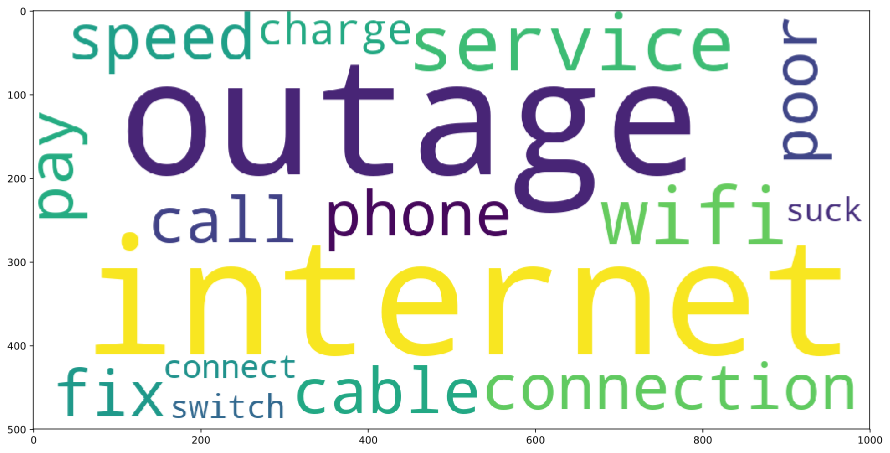

In [90]:
import matplotlib.pyplot as plt
my_list=text
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
#plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [91]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [92]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.102*"service" + 0.046*"call" + 0.036*"month" + 0.036*"outage" + '
  '0.027*"can" + 0.026*"hour" + 0.026*"issue" + 0.026*"comcast" + 0.020*"bad" '
  '+ 0.019*"tell"'),
 (1,
  '0.061*"pay" + 0.054*"get" + 0.051*"co" + 0.043*"be" + 0.026*"speed" + '
  '0.020*"bill" + 0.019*"home" + 0.019*"problem" + 0.019*"new" + '
  '0.018*"account"'),
 (2,
  '0.052*"watch" + 0.051*"tv" + 0.026*"minute" + 0.022*"channel" + '
  '0.021*"good" + 0.021*"demand" + 0.020*"way" + 0.018*"customer" + '
  '0.016*"happen" + 0.016*"email"'),
 (3,
  '0.049*"phone" + 0.041*"say" + 0.038*"use" + 0.037*"try" + 0.030*"last" + '
  '0.027*"give" + 0.026*"day" + 0.023*"set" + 0.018*"money" + '
  '0.018*"mobile_care"'),
 (4,
  '0.121*"internet" + 0.051*"go" + 0.045*"work" + 0.042*"time" + 0.037*"fix" + '
  '0.033*"cable" + 0.023*"week" + 0.020*"wifi" + 0.019*"come" + '
  '0.017*"record"')]


In [93]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.102342903552905

Coherence Score:  0.22671149690654552


In [94]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.346029 -0.171272       1        1  26.087132
0     -0.273007 -0.264525       2        1  25.804688
1     -0.035151  0.285465       3        1  21.041054
3     -0.022891  0.084144       4        1  14.270684
2     -0.014980  0.066188       5        1  12.796438, topic_info=     Category         Freq      Term        Total  loglift  logprob
33    Default  4952.000000  internet  4952.000000  30.0000  30.0000
9     Default  4134.000000   service  4134.000000  29.0000  29.0000
140   Default  2025.000000       pay  2025.000000  28.0000  28.0000
76    Default  2102.000000        go  2102.000000  27.0000  27.0000
2     Default  1790.000000       get  1790.000000  26.0000  26.0000
128   Default  1688.000000        co  1688.000000  25.0000  25.0000
36    Default  1857.000000      call  1857.000000  24.0000  24.0000
182   Default  1843.000000      work  1843.000000  23.0000  23.0000
50    Default  1707.000000      time  1707.000000  22.0000  22.0000
45    Default  1406.000000        be  1406.000000  21.0000  21.0000
48    Default  1107.000000     phone  1107.000000  20.0000  20.0000
20    Default  1042.000000     watch  1042.000000  19.0000  19.0000
105   Default  1027.000000        tv  1027.000000  18.0000  18.0000
147   Default  1503.000000       fix  1503.000000  17.0000  17.0000
3     Default  1473.000000     month  1473.000000  16.0000  16.0000
19    Default  1473.000000    outage  1473.000000  15.0000  15.0000
42    Default  1372.000000     cable  1372.000000  14.0000  14.0000
89    Default   924.000000       say   924.000000  13.0000  13.0000
209   Default   851.000000       use   851.000000  12.0000  12.0000
137   Default   819.000000       try   819.000000  11.0000  11.0000
96    Default  1102.000000       can  1102.000000  10.0000  10.0000
139   Default  1062.000000      hour  1062.000000   9.0000   9.0000
158   Default  1061.000000     issue  1061.000000   8.0000   8.0000
310   Default  1034.000000   comcast  1034.000000   7.0000   7.0000
54    Default   846.000000     speed   846.000000   6.0000   6.0000
183   Default   676.000000      last   676.000000   5.0000   5.0000
90    Default   960.000000      week   960.000000   4.0000   4.0000
323   Default   595.000000      give   595.000000   3.0000   3.0000
207   Default   581.000000       day   581.000000   2.0000   2.0000
161   Default   830.000000       bad   830.000000   1.0000   1.0000
...       ...          ...       ...          ...      ...      ...
20     Topic5  1041.422974     watch  1042.116577   2.0553  -2.9594
105    Topic5  1027.277222        tv  1027.970581   2.0553  -2.9731
148    Topic5   520.908936    minute   521.604370   2.0547  -3.6522
12     Topic5   450.461853   channel   451.153656   2.0545  -3.7975
191    Topic5   417.482208      good   418.176819   2.0543  -3.8735
113    Topic5   413.524689    demand   414.219604   2.0543  -3.8830
340    Topic5   396.438812       way   397.135040   2.0542  -3.9252
368    Topic5   354.111267  customer   354.805267   2.0540  -4.0381
437    Topic5   328.474579    happen   329.166382   2.0539  -4.1133
57     Topic5   315.315399     email   316.009979   2.0538  -4.1542
145    Topic5   302.749054      drop   303.445740   2.0537  -4.1948
190    Topic5   302.477600       cut   303.173706   2.0537  -4.1957
88     Topic5   298.522095      keep   299.217316   2.0537  -4.2089
307    Topic5   290.220032    change   290.912537   2.0536  -4.2371
565    Topic5   290.273865     thing   290.970184   2.0536  -4.2369
255    Topic5   253.503723     spend   254.206924   2.0532  -4.3724
488    Topic5   248.983353     least   249.678024   2.0532  -4.3904
376    Topic5   244.188889   package   244.885315   2.0532  -4.4098
424    Topic5   234.247559    update   234.942963   2.0530  -4.4514
464    Topic5   228.964142      play   229.657440   2.0530  -4.4742
218    Topic5   227.874985       end   228.

In [ ]:
#Again with 10 topics

In [35]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
lsi_model.print_topics()

[(0,
  '0.666*"internet" + 0.428*"service" + 0.180*"work" + 0.177*"pay" + 0.176*"go" + 0.146*"time" + 0.119*"cable" + 0.114*"outage" + 0.114*"call" + 0.108*"get"'),
 (1,
  '0.754*"service" + -0.603*"internet" + 0.130*"call" + 0.088*"bad" + 0.048*"time" + 0.048*"pay" + 0.044*"get" + -0.044*"speed" + 0.042*"month" + -0.039*"slow"'),
 (2,
  '-0.441*"service" + -0.372*"internet" + 0.335*"pay" + 0.240*"co" + 0.238*"be" + 0.224*"get" + 0.224*"time" + 0.185*"watch" + 0.185*"call" + 0.184*"work"'),
 (3,
  '0.674*"pay" + -0.329*"go" + -0.261*"work" + -0.251*"time" + -0.245*"call" + 0.194*"speed" + 0.181*"co" + -0.166*"outage" + 0.125*"month" + -0.113*"hour"'),
 (4,
  '-0.849*"work" + 0.399*"go" + 0.131*"call" + 0.112*"outage" + -0.106*"wifi" + 0.104*"time" + -0.092*"home" + 0.084*"fix" + 0.068*"be" + -0.059*"pay"'),
 (5,
  '0.624*"call" + -0.607*"go" + -0.208*"outage" + 0.156*"phone" + 0.148*"time" + -0.142*"work" + -0.133*"cable" + 0.129*"get" + 0.110*"internet" + -0.080*"service"'),
 (6,
  '-

In [65]:
text = ['outage', 'internet', 'service', 'wifi', 'speed', 'poor','phone', 'cable', 'call', 'connection', 'fix', 'pay', 'charge', 'connect', 'suck', 'switch']

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#makeitastring = ''.join(map(str, text))

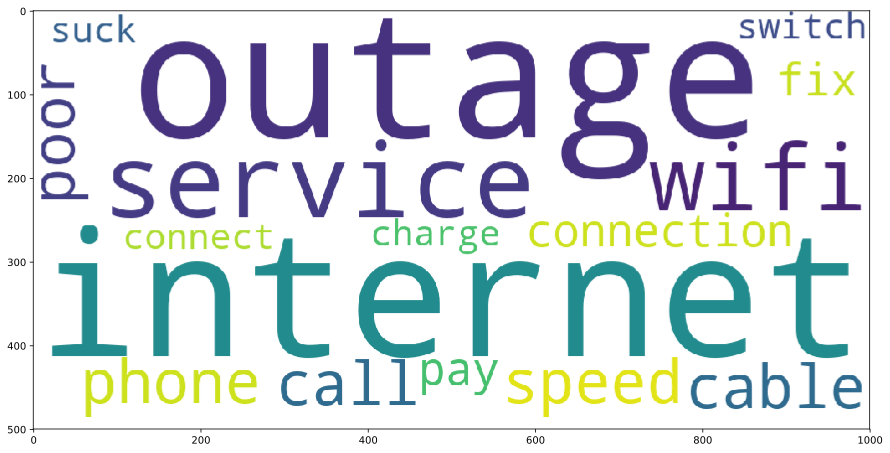

In [68]:
import matplotlib.pyplot as plt
my_list=text
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
#plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"wifi" + 0.070*"show" + 0.057*"give" + 0.051*"xfinity" + 0.049*"know" '
  '+ 0.041*"tech" + 0.037*"demand" + 0.035*"have" + 0.032*"modem" + '
  '0.032*"connection"'),
 (1,
  '0.146*"phone" + 0.065*"area" + 0.054*"send" + 0.046*"dvr" + 0.042*"credit" '
  '+ 0.031*"spend" + 0.030*"recording" + 0.023*"sure" + 0.023*"almost" + '
  '0.023*"dear"'),
 (2,
  '0.105*"outage" + 0.069*"say" + 0.061*"try" + 0.040*"charge" + 0.039*"never" '
  '+ 0.027*"connect" + 0.023*"stop" + 0.021*"long" + 0.021*"keep" + '
  '0.019*"receive"'),
 (3,
  '0.122*"service" + 0.061*"go" + 0.060*"pay" + 0.053*"get" + 0.049*"time" + '
  '0.044*"month" + 0.041*"be" + 0.040*"cable" + 0.031*"comcast" + 0.025*"bad"'),
 (4,
  '0.083*"tv" + 0.061*"guy" + 0.054*"app" + 0.050*"account" + 0.045*"set" + '
  '0.045*"box" + 0.036*"channel" + 0.032*"way" + 0.029*"seem" + '
  '0.025*"company"'),
 (5,
  '0.092*"call" + 0.083*"co" + 0.073*"fix" + 0.047*"week" + 0.042*"speed" + '
  '0.031*"new" + 0.020*"game" + 0.018*"wait

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.500813115962554

Coherence Score:  0.26327843406254753


In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.440711 -0.095168       1        1  23.408913
6      0.043951  0.442722       2        1  14.852029
5     -0.011541 -0.018949       3        1  13.665472
2     -0.052901 -0.045049       4        1   9.177169
4     -0.063088 -0.046678       5        1   7.749642
0     -0.066955 -0.045693       6        1   7.555755
7     -0.068804 -0.046875       7        1   7.079803
8     -0.069967 -0.047458       8        1   6.123227
9     -0.075316 -0.048872       9        1   5.637617
1     -0.076090 -0.047980      10        1   4.750377, topic_info=     Category         Freq        Term        Total  loglift  logprob
35    Default  5354.000000    internet  5354.000000  30.0000  30.0000
9     Default  4516.000000     service  4516.000000  29.0000  29.0000
38    Default  1990.000000        call  1990.000000  28.0000  28.0000
183   Default  1990.000000        work  1990.000000  27.0000  27.0000
19    Default  1518.000000      outage  1518.000000  26.0000  26.0000
130   Default  1796.000000          co  1796.000000  25.0000  25.0000
50    Default  1091.000000       phone  1091.000000  24.0000  24.0000
78    Default  2241.000000          go  2241.000000  23.0000  23.0000
142   Default  2196.000000         pay  2196.000000  22.0000  22.0000
149   Default  1581.000000         fix  1581.000000  21.0000  21.0000
98    Default  1094.000000         can  1094.000000  20.0000  20.0000
141   Default  1150.000000        hour  1150.000000  19.0000  19.0000
159   Default  1148.000000       issue  1148.000000  18.0000  18.0000
21    Default  1006.000000       watch  1006.000000  17.0000  17.0000
2     Default  1942.000000         get  1942.000000  16.0000  16.0000
52    Default  1820.000000        time  1820.000000  15.0000  15.0000
107   Default  1016.000000          tv  1016.000000  14.0000  14.0000
91    Default  1000.000000         say  1000.000000  13.0000  13.0000
3     Default  1609.000000       month  1609.000000  12.0000  12.0000
45    Default   886.000000        wifi   886.000000  11.0000  11.0000
47    Default  1525.000000          be  1525.000000  10.0000  10.0000
81    Default   833.000000        show   833.000000   9.0000   9.0000
44    Default  1469.000000       cable  1469.000000   8.0000   8.0000
139   Default   886.000000         try   886.000000   7.0000   7.0000
92    Default  1005.000000        week  1005.000000   6.0000   6.0000
89    Default   749.000000         guy   749.000000   5.0000   5.0000
15    Default   673.000000      record   673.000000   4.0000   4.0000
210   Default   987.000000         use   987.000000   3.0000   3.0000
56    Default   901.000000       speed   901.000000   2.0000   2.0000
324   Default   678.000000        give   678.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
50    Topic10  1090.956299       phone  1091.762939   3.0462  -1.9261
247   Topic10   484.272491        area   485.079102   3.0453  -2.7383
462   Topic10   407.637573        send   408.444183   3.0450  -2.9105
13    Topic10   343.645508         dvr   344.452332   3.0446  -3.0813
520   Topic10   315.584686      credit   316.391327   3.0444  -3.1665
256   Topic10   231.731049       spend   232.537704   3.0435  -3.4754
16    Topic10   223.546249   recording   224.353104   3.0433  -3.5113
513   Topic10   175.473419        sure   176.280182   3.0424  -3.7534
144   Topic10   173.163712      almost   173.970322   3.0423  -3.7667
634   Topic10   171.221649        dear   172.028320   3.0422  -3.7780
145   Topic10   155.625580         min   156.432281   3.0418  -3.8735
765   Topic10   154.727539       house   155.534210   3.0417  -3.8793
1230  Topic10   150.518967      number   151.325577   3.0416  -3.9068
399   Topic10   145.404465        nice   146.211090   3.0414  -3.9414
316   Topic10   130.818863         due   131.625488   3.0408  -4.0471
1123  Topic10   118

In [ ]:
#Uber

In [95]:

uber = inbounds_and_outbounds[inbounds_and_outbounds["author_id_y"]=="Uber_Support"]


In [96]:
uber['inbound_sentiment'] = \
    uber.text_x.progress_apply(sentiment_for)

In [97]:
count = (uber['inbound_sentiment'] < 0).sum()
count

19030

In [98]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [99]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_words=['hi', 'that', 'us', 'we', 'please', 'Please', 'DM', 'get', 'I', 'help','go','try','see','next', 'make', 'much', 'need','much', 'would','still','keep','can','ever', 'thank', 'may', 'would', 'really','let', 'well', 'could', 'make', 'even', 'buy', 'also', 'ago','https', 'be','away', 'yesterday','case', 'today', 'day', 'amp','try','want', 'person', 'customer', 'product','where', 'really', 'soon' ]

stop_words.extend(new_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
dm= uber['text_x']

In [101]:
data = dm.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [102]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [103]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [105]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm',  disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [106]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [107]:
from gensim.models import LsiModel
lsi_model = LsiModel(
        corpus=corpus,
        id2word=id2word , num_topics = 10        )
lsi_model.print_topics()

[(0,
  '0.730*"driver" + 0.281*"charge" + 0.262*"cancel" + 0.232*"ride" + 0.142*"trip" + 0.141*"get" + 0.123*"take" + 0.117*"time" + 0.103*"order" + 0.102*"wait"'),
 (1,
  '-0.597*"driver" + 0.456*"ride" + 0.394*"charge" + 0.214*"order" + 0.189*"account" + 0.189*"get" + 0.145*"use" + 0.128*"time" + 0.098*"take" + 0.081*"email"'),
 (2,
  '0.533*"order" + -0.409*"charge" + -0.379*"ride" + 0.220*"account" + 0.204*"phone" + 0.176*"use" + 0.155*"can" + 0.152*"food" + 0.136*"number" + 0.129*"get"'),
 (3,
  '0.513*"ride" + -0.413*"charge" + -0.396*"order" + -0.346*"cancel" + 0.225*"account" + 0.224*"phone" + -0.175*"trip" + 0.130*"can" + 0.125*"use" + 0.111*"number"'),
 (4,
  '-0.500*"ride" + 0.415*"charge" + -0.407*"order" + 0.388*"account" + 0.228*"trip" + 0.207*"phone" + -0.165*"cancel" + 0.134*"use" + 0.124*"number" + 0.122*"can"'),
 (5,
  '0.650*"get" + -0.526*"cancel" + -0.265*"account" + -0.189*"phone" + 0.172*"charge" + -0.168*"trip" + -0.143*"can" + -0.132*"wait" + 0.126*"take" + 0.1

In [108]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [109]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.082*"give" + 0.080*"credit" + 0.069*"card" + 0.066*"wrong" + 0.054*"uber" '
  '+ 0.040*"location" + 0.036*"experience" + 0.031*"address" + 0.028*"do" + '
  '0.024*"error"'),
 (1,
  '0.096*"can" + 0.085*"number" + 0.075*"contact" + 0.043*"change" + '
  '0.042*"option" + 0.041*"problem" + 0.031*"report" + 0.030*"already" + '
  '0.028*"destination" + 0.028*"reach"'),
 (2,
  '0.117*"cancel" + 0.104*"order" + 0.096*"time" + 0.075*"wait" + 0.062*"go" + '
  '0.040*"hour" + 0.036*"back" + 0.031*"ask" + 0.024*"long" + 0.019*"happen"'),
 (3,
  '0.138*"service" + 0.088*"support" + 0.066*"bad" + 0.064*"pass" + '
  '0.058*"receive" + 0.051*"response" + 0.035*"look" + 0.035*"able" + '
  '0.023*"different" + 0.022*"price"'),
 (4,
  '0.078*"pay" + 0.078*"minute" + 0.055*"show" + 0.029*"fee" + 0.026*"day" + '
  '0.024*"reply" + 0.022*"right" + 0.021*"reason" + 0.020*"hold" + '
  '0.019*"keep"'),
 (5,
  '0.076*"drive" + 0.062*"make" + 0.036*"refuse" + 0.030*"team" + 0.027*"turn" '
  '+ 0.027*"

In [110]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.299855300608555

Coherence Score:  0.2548472290020354


In [111]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.424627 -0.160732       1        1  25.679955
7      0.108980  0.438322       2        1  17.384216
2     -0.000188 -0.012818       3        1  11.956756
9     -0.039441 -0.032126       4        1   9.712889
4     -0.064295 -0.037912       5        1   8.078474
1     -0.076735 -0.036931       6        1   6.403857
3     -0.082516 -0.037012       7        1   5.741042
5     -0.088902 -0.040944       8        1   5.596541
0     -0.087617 -0.039873       9        1   5.415005
8     -0.093914 -0.039974      10        1   4.031271, topic_info=     Category          Freq          Term         Total  loglift  logprob
29    Default  12697.000000        driver  12697.000000  30.0000  30.0000
41    Default   4279.000000        cancel   4279.000000  29.0000  29.0000
45    Default   5950.000000          ride   5950.000000  28.0000  28.0000
18    Default   3776.000000         order   3776.000000  27.0000  27.0000
1     Default   5531.000000        charge   5531.000000  26.0000  26.0000
37    Default   3511.000000          time   3511.000000  25.0000  25.0000
140   Default   2418.000000       service   2418.000000  24.0000  24.0000
159   Default   2642.000000           say   2642.000000  23.0000  23.0000
77    Default   3437.000000       account   3437.000000  22.0000  22.0000
27    Default   2740.000000          wait   2740.000000  21.0000  21.0000
10    Default   4187.000000           get   4187.000000  20.0000  20.0000
38    Default   3121.000000           use   3121.000000  19.0000  19.0000
83    Default   2323.000000            be   2323.000000  18.0000  18.0000
217   Default   1865.000000           can   1865.000000  17.0000  17.0000
23    Default   2901.000000         phone   2901.000000  16.0000  16.0000
48    Default   3729.000000          trip   3729.000000  15.0000  15.0000
60    Default   1921.000000           pay   1921.000000  14.0000  14.0000
105   Default   1918.000000        minute   1918.000000  13.0000  13.0000
162   Default   2055.000000           app   2055.000000  12.0000  12.0000
17    Default   2244.000000            go   2244.000000  11.0000  11.0000
73    Default   3459.000000          take   3459.000000  10.0000  10.0000
22    Default   1661.000000        number   1661.000000   9.0000   9.0000
14    Default   3277.000000            co   3277.000000   8.0000   8.0000
26    Default   1548.000000       support   1548.000000   7.0000   7.0000
79    Default   1472.000000       contact   1472.000000   6.0000   6.0000
36    Default   1354.000000          give   1354.000000   5.0000   5.0000
128   Default   2229.000000           try   2229.000000   4.0000   4.0000
42    Default   1322.000000        credit   1322.000000   3.0000   3.0000
7     Default   1302.000000         drive   1302.000000   2.0000   2.0000
295   Default   2076.000000         email   2076.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
301   Topic10    953.371521       request    954.173767   3.2102  -2.5561
261   Topic10    864.981689          last    865.783936   3.2102  -2.6534
47    Topic10    627.527710         think    628.329956   3.2098  -2.9743
305   Topic10    610.421265         first    611.223511   3.2098  -3.0019
198   Topic10    594.830200           fix    595.632446   3.2097  -3.0278
142   Topic10    589.832458         month    590.634766   3.2097  -3.0362
49    Topic10    513.052856          want    513.855225   3.2095  -3.1757
241   Topic10    497.457214           add    498.259460   3.2095  -3.2066
194   Topic10    432.664093        second    433.466400   3.2092  -3.3461
151   Topic10    406.963318     seriously    407.765717   3.2091  -3.4074
479   Topic10    325.675140       receipt    326.477448   3.2086  -3.6302
685   Topic10    283.977966          many    284.780182   3.2083  -3.7672
811   Topic10    251.838135      business    252.6403